In [152]:
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily
import pandas as pd
import numpy as np
from meteostat import Stations
import SNnumlib as snnl

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)

RANDOM_STATE = 42

In [89]:
START_DATE = '2017-01-01'
END_DATE = '2017-12-31'

stations = Stations()
stations = stations.fetch().drop(columns=['region', 'wmo', 'icao', 'elevation', 'timezone'])
stations = stations[stations['daily_start'] <= START_DATE][stations['daily_end'] >= END_DATE]

stations

,name,country,latitude,longitude,hourly_start,hourly_end,daily_start,daily_end,monthly_start,monthly_end
id,,,,,,,,,,
00FAY,Holden Agdm,CA,53.1900,-112.2500,2020-01-01,2024-06-10,2002-11-01,2024-03-13,2003-01-01,2022-01-01
00TG6,Athabasca 1,CA,54.7200,-113.2900,NaT,NaT,2000-01-01,2022-07-12,2000-01-01,2010-01-01
01001,Jan Mayen,NO,70.9333,-8.6667,1931-01-01,2024-04-17,1921-12-31,2024-06-03,1922-01-01,2022-01-01
01002,Grahuken,NO,79.7833,14.4667,1986-11-09,2024-04-17,2010-10-07,2020-08-17,NaT,NaT
01003,Hornsund,NO,77.0000,15.5000,1985-06-01,2024-04-17,2009-11-26,2020-08-31,2016-01-01,2017-01-01
...,...,...,...,...,...,...,...,...,...,...
ZVNY0,Kitimat Townsite,CA,54.0500,-128.6300,NaT,NaT,2000-01-01,2022-08-31,2000-01-01,2018-01-01
ZWWW0,Diwopu / Urumqi / Dihua,CN,43.9000,87.4667,1985-02-09,2024-06-10,1990-08-27,2022-04-25,2006-01-01,2022-01-01
ZX07Q,Okotoks,CA,50.7300,-113.9600,NaT,NaT,2000-01-01,2022-12-02,2000-01-01,2021-01-01


In [77]:
SAMPLE = 50
daily_df = []
NA_stations = stations[stations['country'].isin(['US', 'CA', 'MX'])]
for i, id in enumerate(NA_stations.index):
    print(i, len(NA_stations))
    daily_df.append(Daily(id, START_DATE,END_DATE).fetch())

0 3500
1 3500
2 3500
3 3500
4 3500
5 3500
6 3500
7 3500
8 3500
9 3500
10 3500
11 3500
12 3500
13 3500
14 3500
15 3500
16 3500
17 3500
18 3500
19 3500
20 3500
21 3500
22 3500
23 3500
24 3500
25 3500
26 3500
27 3500
28 3500
29 3500
30 3500
31 3500
32 3500
33 3500
34 3500
35 3500
36 3500
37 3500
38 3500
39 3500
40 3500
41 3500
42 3500
43 3500
44 3500
45 3500
46 3500
47 3500
48 3500
49 3500
50 3500
51 3500
52 3500
53 3500
54 3500
55 3500
56 3500
57 3500
58 3500
59 3500
60 3500
61 3500
62 3500
63 3500
64 3500
65 3500
66 3500
67 3500
68 3500
69 3500
70 3500
71 3500
72 3500
73 3500
74 3500
75 3500
76 3500
77 3500
78 3500
79 3500
80 3500
81 3500
82 3500
83 3500
84 3500
85 3500
86 3500
87 3500
88 3500
89 3500
90 3500
91 3500
92 3500
93 3500
94 3500
95 3500
96 3500
97 3500
98 3500
99 3500
100 3500
101 3500
102 3500
103 3500
104 3500
105 3500
106 3500
107 3500
108 3500
109 3500
110 3500
111 3500
112 3500
113 3500
114 3500
115 3500
116 3500
117 3500
118 3500
119 3500
120 3500
121 3500
122 3500
123

In [78]:
merged_df = pd.DataFrame(columns=['country', 'name', 'latitude', 'longitude'] + list(daily_df[0].index.astype(str)))
merged_df['country'] = NA_stations['country']
merged_df['name'] = NA_stations['name']
merged_df['latitude'] = NA_stations['latitude']
merged_df['longitude'] = NA_stations['longitude']

j = 0
for i, daily in zip(NA_stations.index, daily_df):
    print(j, len(NA_stations))
    j += 1
    merged_df.loc[i,START_DATE:END_DATE] = daily['tavg']
        
merged_df.columns

0 3500
1 3500
2 3500
3 3500
4 3500
5 3500
6 3500
7 3500
8 3500
9 3500
10 3500
11 3500
12 3500
13 3500
14 3500
15 3500
16 3500
17 3500
18 3500
19 3500
20 3500
21 3500
22 3500
23 3500
24 3500
25 3500
26 3500
27 3500
28 3500
29 3500
30 3500
31 3500
32 3500
33 3500
34 3500
35 3500
36 3500
37 3500
38 3500
39 3500
40 3500
41 3500
42 3500
43 3500
44 3500
45 3500
46 3500
47 3500
48 3500
49 3500
50 3500
51 3500
52 3500
53 3500
54 3500
55 3500
56 3500
57 3500
58 3500
59 3500
60 3500
61 3500
62 3500
63 3500
64 3500
65 3500
66 3500
67 3500
68 3500
69 3500
70 3500
71 3500
72 3500
73 3500
74 3500
75 3500
76 3500
77 3500
78 3500
79 3500
80 3500
81 3500
82 3500
83 3500
84 3500
85 3500
86 3500
87 3500
88 3500
89 3500
90 3500
91 3500
92 3500
93 3500
94 3500
95 3500
96 3500
97 3500
98 3500
99 3500
100 3500
101 3500
102 3500
103 3500
104 3500
105 3500
106 3500
107 3500
108 3500
109 3500
110 3500
111 3500
112 3500
113 3500
114 3500
115 3500
116 3500
117 3500
118 3500
119 3500
120 3500
121 3500
122 3500
123

Index(['country', 'name', 'latitude', 'longitude', '2017-01-01', '2017-01-02',
       '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06',
       ...
       '2017-12-20', '2017-12-21', '2017-12-22', '2017-12-23', '2017-12-24',
       '2017-12-25', '2017-12-26', '2017-12-27', '2017-12-28', '2017-12-31'],
      dtype='object', length=320)

In [90]:
nans_series = []
nans_counter = 0
for row in merged_df.isna().values:
    nans_series_temp = []
    for val in row:
        if val:
            nans_counter += 1
        elif nans_counter > 0:
            nans_series_temp.append(nans_counter)
            nans_counter = 0
    
    nans_series_temp.append(nans_counter)
    nans_counter = 0
    nans_series.append(nans_series_temp)

nans_series_df = pd.DataFrame(data={'nans': merged_df.isna().sum(axis=1).values, 'nans_series': nans_series, 'max': [np.array(ser).max() for ser in nans_series]}, index=merged_df.index)
nans_series_df

,nans,nans_series,max
id,,,
00FAY,87,"[1, 2, 1, 1, 3, 6, 2, 1, 2, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 4, 3, 2, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 3, 3, 1, 1, 1, 2, 1, 2, 0]",6
025P3,100,"[7, 2, 2, 2, 3, 1, 1, 1, 5, 2, 1, 1, 2, 4, 3, 5, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2, 1, 4, 2, 2, 1, 1, 3, 2, 2, 1, 2, 2, 4, 1, 2, 2, 1, 7, 1, 2, 0]",7
02FNZ,0,[0],0
07QNC,6,"[1, 1, 1, 3, 0]",3
087BL,11,"[1, 1, 1, 2, 2, 1, 1, 2, 0]",2
...,...,...,...
ZQPPD,129,"[2, 6, 2, 2, 9, 1, 2, 1, 2, 1, 5, 1, 1, 1, 7, 4, 2, 8, 1, 2, 3, 1, 4, 7, 5, 8, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 3, 2, 3, 3, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1]",9
ZRBBD,17,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 0]",2
ZVNY0,21,"[1, 2, 1, 1, 2, 3, 2, 9]",9


In [191]:
def filter_stations_with_nans_recursively(df, first_days, last_days):
    previous_shape = 0
    current_shape = df.shape[0]

    while previous_shape != current_shape:
        previous_shape = current_shape
        df = df.dropna(subset=first_days, how='any').dropna(subset=last_days, how='any')
        current_shape = df.shape[0]

    return df

In [194]:
to_delete = nans_series_df[nans_series_df['max'] > 10].index

merged_df_orig = merged_df.copy()
merged_df = merged_df.drop(to_delete)

first_three_days = merged_df.columns[5:8]
last_three_days = merged_df.columns[-3:]

merged_df = filter_stations_with_nans_recursively(merged_df, first_three_days, last_three_days)

merged_df.shape, merged_df_orig.shape

((2448, 320), (2747, 320))

['blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue' 'blue'
 'blue

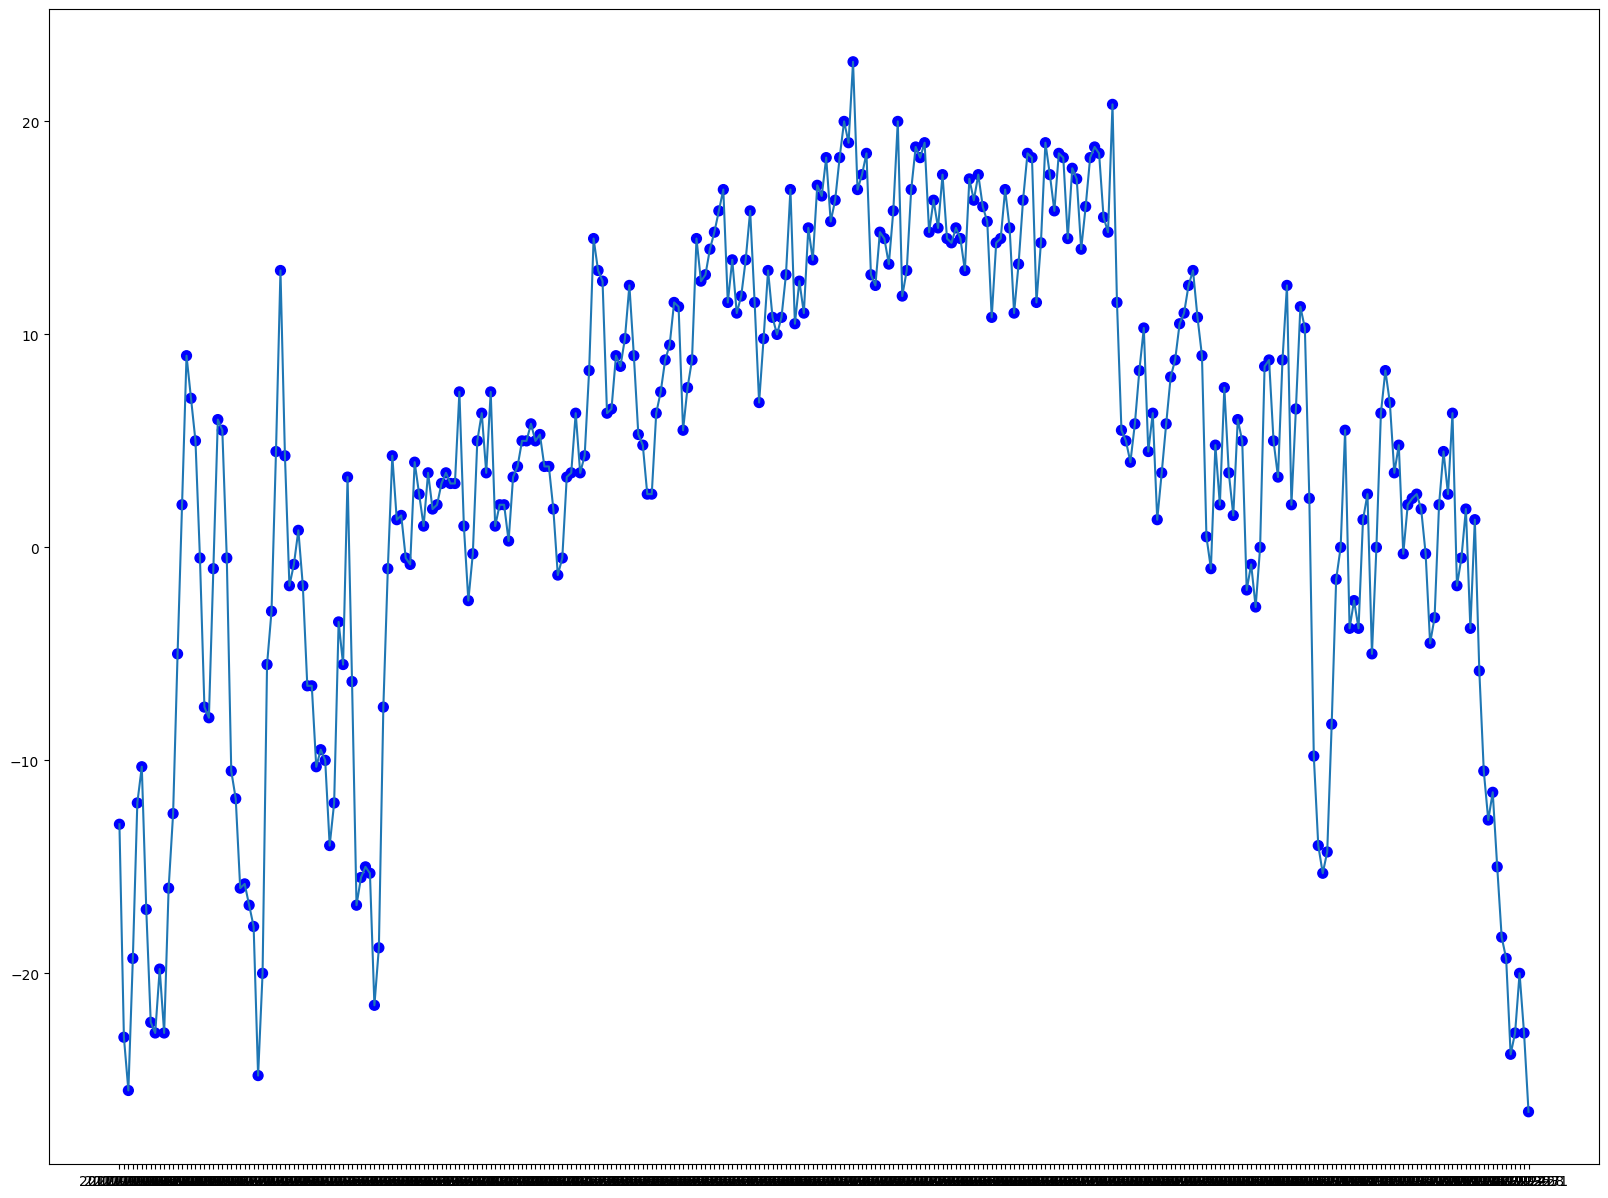

In [198]:
nans_ind = np.arange(len(merged_df.columns))[merged_df.isna().iloc[0,:]]
nans_dyn = np.copy(nans_ind)

mask = []

# print(nans_ind)

for id in nans_ind:
    left_stop = id - 1
    left_start = id - 2
    while left_stop in nans_dyn:
        left_stop -= 1
    while left_start in nans_dyn or left_start == left_stop:
        left_start -= 1
    if left_start > left_stop:
        temp = left_stop
        left_stop = left_start
        left_start = temp
    right_start = id + 1
    right_stop = id + 2
    while right_stop in nans_dyn:
        right_stop += 1
    while right_start in nans_dyn or right_start == right_stop:
        right_start += 1
    if right_start > right_stop:
        temp = right_stop
        right_stop = right_start
        right_start = temp
    if right_stop >= len(merged_df.columns):
        right_stop = len(merged_df.columns) - 1
    
    mask.append(np.array([left_start, left_stop, right_start, right_stop]))

    nans_dyn = np.delete(nans_dyn, np.argwhere(nans_dyn == id))


test_interpolation = merged_df.iloc[0,:]
colors = test_interpolation.isna().apply(lambda x: 'red' if x else 'blue').values

for m, n in zip(mask, nans_ind):
    # print(m, test_interpolation.iloc[m].values, n)
    test_interpolation.iloc[n] = snnl.lagrange_interpolation(m, test_interpolation.iloc[m].values, n)

test_interpolation.reset_index()

print(colors)
plt.figure(figsize=(20, 15))
plt.plot(test_interpolation.index[4:], test_interpolation.values[4:])
plt.scatter(test_interpolation.index[4:], test_interpolation.values[4:], c=colors[4:], s=50)
plt.show()

In [200]:
merged_df

In [159]:
snnl.lagrange_interpolation([12, 13, 15, 16], [-20.6, -24.8, -26.7, -15.0], 14)

-28.399999999999995

In [127]:
np.concatenate((np.array([0,1]), np.array([0,1])))

array([0, 1, 0, 1])

In [121]:
def interpolate(df):
  def interpolate_column(df, column_name):
    col = df[column_name].values  # Użyj .values, aby uzyskać wartości jako numpy array
    n = len(col)
    # Zidentyfikowanie NaN w kolumnie
    nan_indices = np.where(np.isnan(col))[0]
    if len(nan_indices) == 0:
        return col

    # Przejście przez wszystkie NaN i interpolowanie wartości
    for nan_index in nan_indices:
        # Znalezienie poprzednich i następnych wartości
        prev_index = nan_index - 1
        next_index = nan_index + 1

        # Szukanie poprzedniej nie-NaN wartości
        while prev_index >= 0 and np.isnan(col[prev_index]):
            prev_index -= 1

        # Szukanie następnej nie-NaN wartości
        while next_index < n and np.isnan(col[next_index]):
            next_index += 1

        # Interpolacja liniowa
        if prev_index >= 0 and next_index < n:
            col[nan_index] = col[prev_index] + (col[next_index] - col[prev_index]) * (nan_index - prev_index) / (next_index - prev_index)
        elif prev_index >= 0:
            col[nan_index] = col[prev_index]
        elif next_index < n:
            col[nan_index] = col[next_index]

    return col

  # Zastosowanie funkcji do wszystkich kolumn zawierających NaN
  for column in df.columns:
      if df[column].isna().sum() > 0:
          df[column] = interpolate_column(df, column)

  print(df.isna().sum())

Remaining NaNs after Lagrange interpolation:
country    1000
name       1000
dtype: int64


,country,name,latitude,longitude,2017-01-01,2017-01-02,2017-01-03,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,2017-01-14,2017-01-16,2017-01-17,2017-01-18,2017-01-19,2017-01-20,2017-01-21,2017-01-26,2017-01-27,2017-01-28,2017-01-29,2017-01-30,2017-01-31,2017-02-01,2017-02-02,2017-02-03,2017-02-04,2017-02-05,2017-02-07,2017-02-08,2017-02-09,2017-02-11,2017-02-13,2017-02-15,2017-02-17,2017-02-18,2017-02-19,2017-02-20,2017-02-21,2017-02-22,2017-02-23,2017-02-24,2017-02-25,2017-02-26,2017-02-27,2017-02-28,2017-03-01,2017-03-02,2017-03-03,2017-03-04,2017-03-05,2017-03-06,2017-03-07,2017-03-08,2017-03-09,2017-03-11,2017-03-12,2017-03-13,2017-03-14,2017-03-17,2017-03-19,2017-03-20,2017-03-21,2017-03-22,2017-03-23,2017-03-24,2017-03-25,2017-03-26,2017-03-27,2017-03-28,2017-03-29,2017-03-30,2017-03-31,2017-04-01,2017-04-02,2017-04-03,2017-04-04,2017-04-05,2017-04-06,2017-04-07,2017-04-08,2017-04-09,2017-04-10,2017-04-11,2017-04-12,2017-04-14,2017-04-15,2017-04-16,2017-04-18,2017-04-19,2017-04-20,2017-04-21,2017-04-22,2017-04-23,2017-04-24,2017-04-25,2017-04-26,2017-04-28,2017-04-29,2017-04-30,2017-05-01,2017-05-02,2017-05-03,2017-05-04,2017-05-05,2017-05-06,2017-05-07,2017-05-08,2017-05-09,2017-05-10,2017-05-11,2017-05-12,2017-05-13,2017-05-14,2017-05-15,2017-05-16,2017-05-17,2017-05-18,2017-05-19,2017-05-20,2017-05-21,2017-05-22,2017-05-23,2017-05-24,2017-05-25,2017-05-26,2017-05-27,2017-05-28,2017-05-29,2017-05-30,2017-05-31,2017-06-01,2017-06-02,2017-06-03,2017-06-04,2017-06-05,2017-06-06,2017-06-07,2017-06-08,2017-06-09,2017-06-10,2017-06-11,2017-06-12,2017-06-13,2017-06-15,2017-06-17,2017-06-19,2017-06-20,2017-06-21,2017-06-23,2017-06-24,2017-06-25,2017-06-29,2017-07-01,2017-07-02,2017-07-03,2017-07-04,2017-07-05,2017-07-06,2017-07-07,2017-07-08,2017-07-09,2017-07-13,2017-07-15,2017-07-16,2017-07-17,2017-07-18,2017-07-19,2017-07-20,2017-07-21,2017-07-22,2017-07-23,2017-07-24,2017-07-25,2017-07-26,2017-07-27,2017-07-29,2017-07-30,2017-07-31,2017-08-01,2017-08-02,2017-08-03,2017-08-04,2017-08-05,2017-08-06,2017-08-07,2017-08-08,2017-08-10,2017-08-11,2017-08-12,2017-08-13,2017-08-14,2017-08-15,2017-08-16,2017-08-17,2017-08-18,2017-08-19,2017-08-20,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-26,2017-08-27,2017-08-28,2017-08-29,2017-08-30,2017-08-31,2017-09-01,2017-09-02,2017-09-03,2017-09-04,2017-09-05,2017-09-06,2017-09-07,2017-09-08,2017-09-09,2017-09-10,2017-09-11,2017-09-12,2017-09-13,2017-09-14,2017-09-15,2017-09-16,2017-09-17,2017-09-18,2017-09-19,2017-09-20,2017-09-21,2017-09-22,2017-09-23,2017-09-24,2017-09-25,2017-09-26,2017-09-27,2017-09-28,2017-09-29,2017-09-30,2017-10-01,2017-10-02,2017-10-03,2017-10-04,2017-10-05,2017-10-06,2017-10-07,2017-10-08,2017-10-09,2017-10-10,2017-10-11,2017-10-12,2017-10-13,2017-10-14,2017-10-15,2017-10-16,2017-10-19,2017-10-20,2017-10-23,2017-10-25,2017-10-26,2017-10-27,2017-10-28,2017-10-29,2017-10-31,2017-11-02,2017-11-03,2017-11-04,2017-11-06,2017-11-08,2017-11-10,2017-11-11,2017-11-13,2017-11-14,2017-11-15,2017-11-16,2017-11-18,2017-11-19,2017-11-20,2017-11-21,2017-11-22,2017-11-23,2017-11-24,2017-11-25,2017-11-26,2017-11-27,2017-11-28,2017-11-29,2017-11-30,2017-12-01,2017-12-02,2017-12-03,2017-12-08,2017-12-09,2017-12-10,2017-12-11,2017-12-12,2017-12-13,2017-12-14,2017-12-15,2017-12-16,2017-12-17,2017-12-18,2017-12-19,2017-12-20,2017-12-21,2017-12-22,2017-12-23,2017-12-24,2017-12-25,2017-12-26,2017-12-27,2017-12-28,2017-12-31
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
00FAY,<NA>,NaN,53.1900,-112.2500,-17.600,-23.2,-21.10,-15.70,-14.4,-20.700,-18.700,-24.1,-20.600,-24.800,-66.4,-26.7,-15.000,13.6,-56.8,2.400,1.3,0.3,-5.7,2.5,-6.6,-1.9

In [81]:
np.array(np.unique(np.array([x for series in nans_series for x in series]), return_counts=True)).T

array([[    0,  2944],
       [    1, 11435],
       [    2,  4565],
       [    3,  1740],
       [    4,   848],
       [    5,   532],
       [    6,   311],
       [    7,   203],
       [    8,   165],
       [    9,   146],
       [   10,    85],
       [   11,    83],
       [   12,    68],
       [   13,    43],
       [   14,    62],
       [   15,    57],
       [   16,    41],
       [   17,    29],
       [   18,    33],
       [   19,    32],
       [   20,    28],
       [   21,    33],
       [   22,    21],
       [   23,    28],
       [   24,    21],
       [   25,    11],
       [   26,    22],
       [   27,    12],
       [   28,    14],
       [   29,    10],
       [   30,    12],
       [   31,     9],
       [   32,     7],
       [   33,     9],
       [   34,    10],
       [   35,     9],
       [   36,     8],
       [   37,    13],
       [   38,     8],
       [   39,     8],
       [   40,     5],
       [   41,     5],
       [   42,     6],
       [   

In [82]:
snnl.newton_interpolate([1,2,3,5], [1, 2, 3, 1], 4)

(4.0, [1, 1.0, 0.0, -0.16666666666666666])

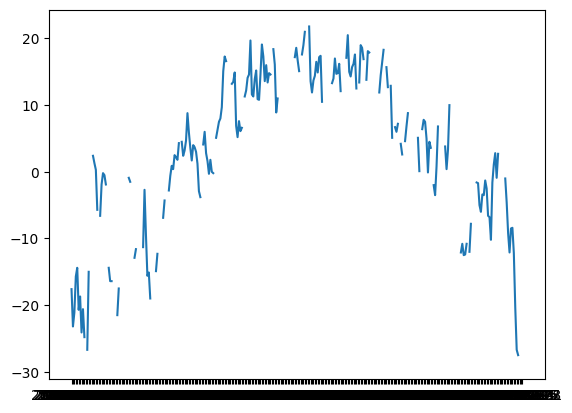

In [83]:
def plot_year_temperature(df, station_id):
    plt.plot(df.columns[4:], df.loc[station_id, START_DATE:END_DATE])
    #plt.scatter(df.columns[4:], df.loc[station_id, START_DATE:END_DATE], c=color.loc[station_id, START_DATE:END_DATE].values, s=3)
    plt.show()

is_interpolated = merged_df.isna()

plot_year_temperature(merged_df, merged_df.index[0])

In [84]:
values_df = merged_df.iloc[:,4:]

num_x = np.arange(values_df.shape[1])[~values_df.isna().iloc[0, :]]
num_y = values_df.iloc[0, num_x].values
nan_x = np.arange(values_df.shape[1])[values_df.isna().iloc[0, :]]

print(num_x, num_y, nan_x)

test_interpolarion = values_df.iloc[0, :]
#interpolated = test_interpolarion.isna()

for nan in nan_x:
    test_interpolarion.iloc[nan] = snnl.lagrange_interpolation(num_x, num_y, nan)

snnl.newton_interpolate(num_x[1:12], num_y[1:12], 10) 

[  0   1   2   3   4   5   6   7   8   9  11  12  15  16  17  18  20  21
  22  23  24  26  27  28  32  33  40  41  44  45  47  50  51  52  53  54
  55  59  60  64  65  68  69  70  71  72  73  74  75  77  78  79  80  81
  82  83  84  85  86  87  88  89  90  92  93  94  95  96  97  98  99 101
 102 103 104 105 106 107 108 110 112 113 114 115 116 117 118 119 121 122
 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138 139 141
 142 143 144 149 153 156 157 158 159 161 162 163 166 167 168 169 170 171
 172 173 174 175 180 182 183 184 185 186 187 188 190 192 193 194 195 196
 197 198 199 201 202 203 204 206 207 208 210 212 215 216 217 218 220 221
 223 224 226 227 228 230 231 233 234 235 238 240 242 243 245 246 247 248
 249 250 251 253 254 255 256 258 261 262 263 264 268 272 273 274 275 276
 278 279 281 283 284 285 286 287 288 289 290 291 292 293 294 295 296 297
 298 301 303 304 305 306 307 308 309 310 311 312 315] [-17.6 -23.2 -21.1 -15.7 -14.4 -20.7 -18.7 -24.1 -20.6 -24.8 -26.7 -15

(-93.12909090909231,
 [1,
  2.099999999999998,
  1.6500000000000021,
  -1.2333333333333345,
  0.1625000000000005,
  0.12916666666666649,
  -0.09236111111111107,
  0.03593253968253968,
  -0.010520833333333333,
  0.0020149911816578483,
  -0.000335016835016835])

In [85]:
snnl.lagrange_interpolation([1,2,3,5, 6, 7, 8, 9], [1, 2, 3, 1, 2,3,4,5], 4)

1.5000000000000002

In [86]:
snnl.lagrange_interpolation(num_x, num_y, 13) 

7.973184729742382e+56

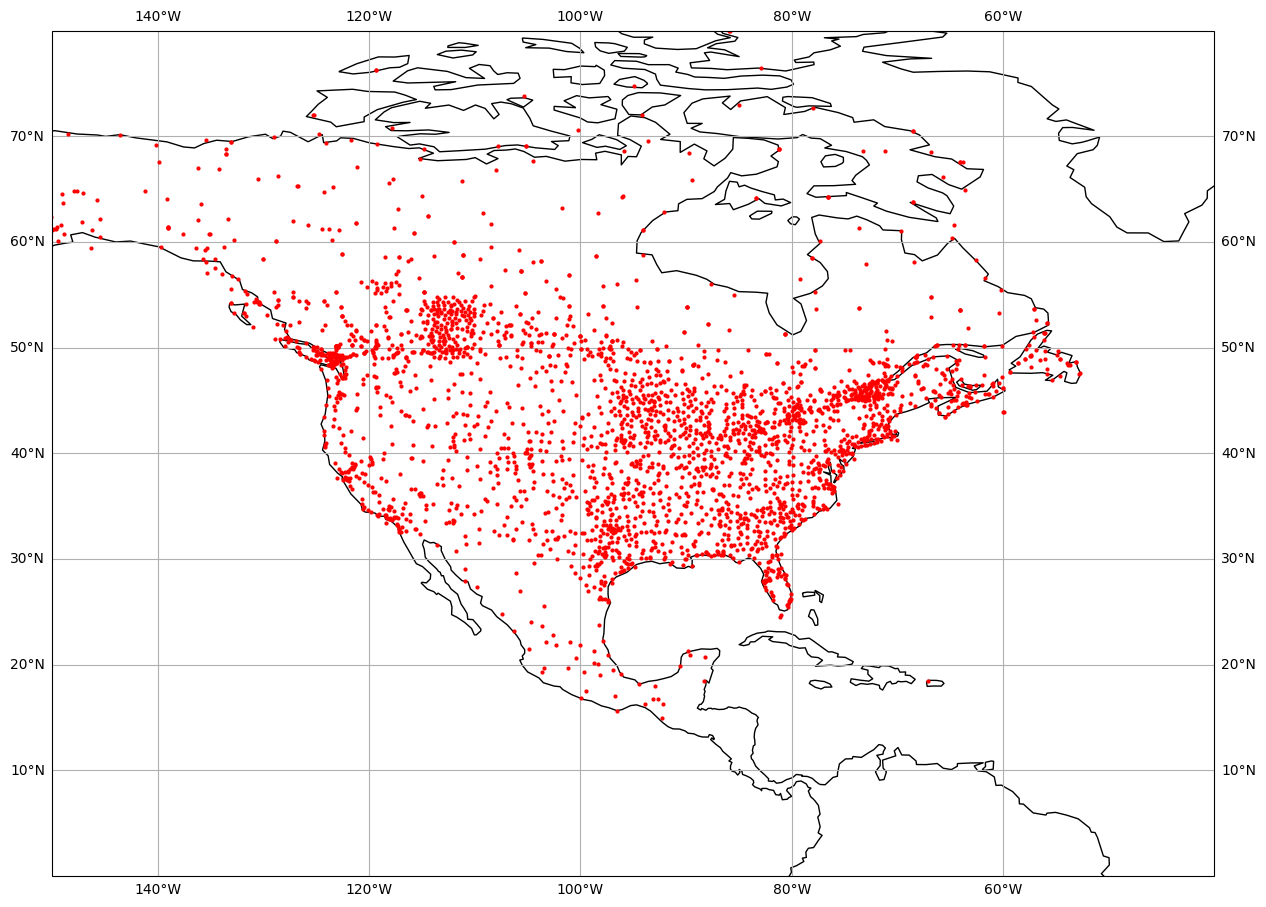

In [87]:
import matplotlib.pyplot as plt
import cartopy.crs as crt
import cartopy.feature as cf

proj = crt.PlateCarree() #let's set the map's projection
fig, ax = plt.subplots(subplot_kw=dict(projection=proj), figsize=(15, 30))#now we need to create a figure with the pre-set projection and a size

#europa
#ax.set_extent([-10, 40, 30, 70], crs=crt.PlateCarree())#let's limit the coordinates to have only the region of MODIS product
#USA
ax.set_extent([-150, -40, 0, 80], crs=crt.PlateCarree())#let's limit the coordinates to have only the region of MODIS product

#plt.contourf(lons, lats, data,transform=crt.PlateCarree(), cmap = 'summer') #let's add a countor of the data using matplotlib
'''Adding nice cartopy features'''
#ax.add_feature(cf.BORDERS, edgecolor='black', linewidth=1) 
# ax.add_feature(cf.LAKES,  alpha=0.5)
# ax.add_feature(cf.LAND)
ax.add_feature(cf.COASTLINE, edgecolor='black', linewidth=1)
# ax.add_feature(cf.RIVERS, edgecolor='blue', linewidth=0.5)
#tates_provinces = cf.NaturalEarthFeature( category='cultural',  name='admin_1_states_provinces', scale='10m', facecolor='none')
#ax.add_feature(states_provinces, edgecolor='black', zorder=10, linestyle = '-', linewidth=0.5)


ax.gridlines(draw_labels=True)#formating the grid

lon, lat = merged_df['longitude'].values, merged_df['latitude'].values 
ax.plot(lon,lat,  'bo', markersize=2, color = 'red', transform=crt.Geodetic())#adding some random marker to the map